# Data visualization

This Jupyter Notebook presents some simple visualizations using the datasets that have been created using the Inside Airbnb data.

The code below relies on previously run Notebooks “1st_stage_panel_data_cleaning.ipynb” and “Calendar_integration_partA.ipynb” and "Calendar_integration_partB". In particular, this notebook will load in:  
* [CITY]_"_cal_rev_list_FULLMERGE_" + [N_days_before] + "_days.csv.gz" file created in the “Calendar_integration_partB” notebook
* [CITY]_Revs.csv.gz  created in the “Calendar_integration_partB” notebook

Review files must also be saved in the Raw Data path in order for the code below to run.

In [2]:
import os
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import dates

In [3]:
# Select city to work with

city_folder = 'united-states_portland/'
city_abbrev = 'POR'

In [4]:
# Universal directory setup
cwd1 = os.getcwd()

# Go up one directory level
os.chdir('..')
cwd2 = os.getcwd()

# Set paths
data_path = cwd2 + '/Saved data/'
csv_path = cwd2 + '/0. Raw data/' + city_folder

In [5]:
# Establish dataset names

# Set how many days before a review a property is assumed to be active. 
N_days_before = int(10)

full_merge_file = "_cal_rev_list_FULLMERGE_" + str(N_days_before) + "_days.csv.gz"
review_file = "_Revs.csv.gz"

In [6]:
#Load in data
os.chdir(data_path)

full_data = pd.read_csv(city_abbrev + full_merge_file, low_memory=False)
review_data = pd.read_csv(data_path + city_abbrev + review_file, low_memory=False)

# Visualizing imputed bookings

The proposed method of imputing bookings will perform poorly at the beginning and end of the observed time series since it relies on both forward-looking and backward-looking measures. At the beginning of the time series, almost no listings will appear to have been booked because they were never seen available. At the end of the time series there will be future nights that are likely to get booked after the dataset was created.

We recommend truncating the resulting data so that boundary dates are not used for statistical analysis.

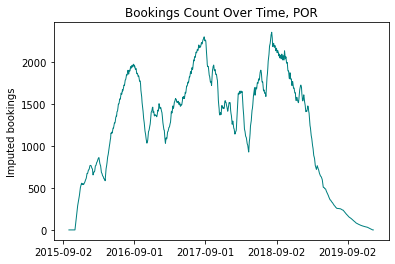

In [7]:
# Graph 30-day moving average for imputed bookings 
count_port = full_data.groupby(['res_date'])['booked'].sum().rolling(window=30).mean()

# Imputed bookings graphic
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(count_port, '-', linewidth=1, color='teal')
plt.title('Bookings Count Over Time, ' + city_abbrev)
plt.ylabel('Imputed bookings' )
plt.show()

## Truncate the imputed bookings

Here we illustrate how a researcher could truncate the bounds of the dataset. We drop 90 days at the start and end of the dataset.

In [8]:
days_to_trunc = 90

start_date = pd.to_datetime(full_data['res_date'].min()) + datetime.timedelta(days=days_to_trunc)
end_date = pd.to_datetime(review_data['date'].max()) - datetime.timedelta(days=days_to_trunc)

start_date = start_date.asm8.astype(str)[:10]
end_date = end_date.asm8.astype(str)[:10]

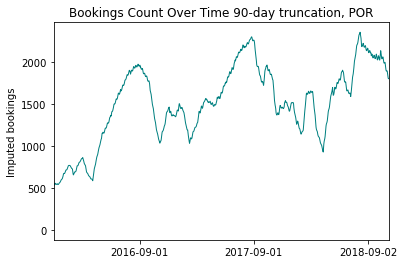

In [9]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(count_port, '-', linewidth=1, color='teal')
plt.title('Bookings Count Over Time ' + str(days_to_trunc) + "-day truncation, " + city_abbrev)
plt.ylabel('Imputed bookings' )
plt.xlim(start_date, end_date)
plt.show()

# Available listings

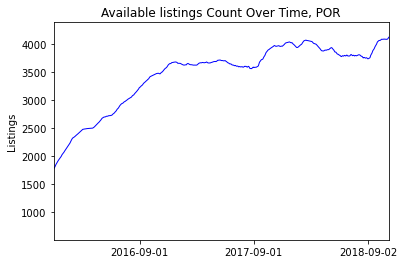

In [10]:
# Graph 30-day moving average for available listings
list_count_port = full_data.groupby(['res_date'])['seen_avail'].sum().rolling(window=30).mean()

# Available listings graphic
fig, ax=plt.subplots()
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(list_count_port, '-', linewidth=1, color='blue')
plt.title('Available listings Count Over Time, ' + city_abbrev)
plt.ylabel('Listings')
plt.xlim(start_date, end_date)
plt.show()

# Bookings by Host Listings

In [11]:
book_count_port_single = full_data[full_data['host_listings_count']==1].groupby(['res_date'])['booked'].sum().rolling(window=30).mean()
book_count_port_multi = full_data[full_data['host_listings_count']>1].groupby(['res_date'])['booked'].sum().rolling(window=30).mean()

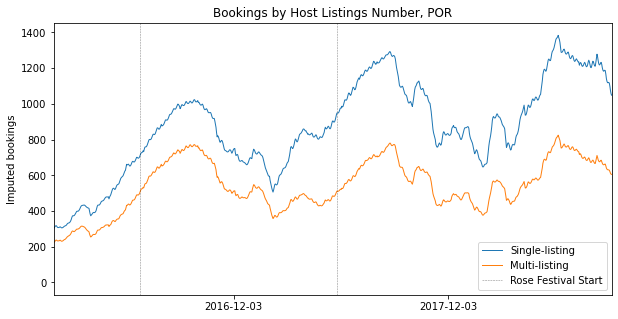

In [17]:
fix, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(book_count_port_single, '-', linewidth=1, label="Single-listing")
plt.plot(book_count_port_multi,'-', linewidth=1, label="Multi-listing")
plt.axvline(x='2015-05-27', c='k', linestyle="--", linewidth=.5, label='Rose Festival Start', alpha=0.5)
plt.axvline(x='2016-05-27', c='k', linestyle="--", linewidth=.5, alpha=0.5)
plt.axvline(x='2017-05-27', c='k', linestyle="--", linewidth=.5, alpha=0.5)
plt.title('Bookings by Host Listings Number, ' + city_abbrev)
plt.ylabel('Imputed bookings')
plt.xlim(start_date, end_date)
plt.legend()
plt.show()

# Listings by Host Listings 

In [40]:
list_count_port_single = full_data[full_data['host_listings_count']==1].groupby(['res_date'])['seen_avail'].sum().rolling(window=30).mean()
list_count_port_multi = full_data[full_data['host_listings_count']>1].groupby(['res_date'])['seen_avail'].sum().rolling(window=30).mean()

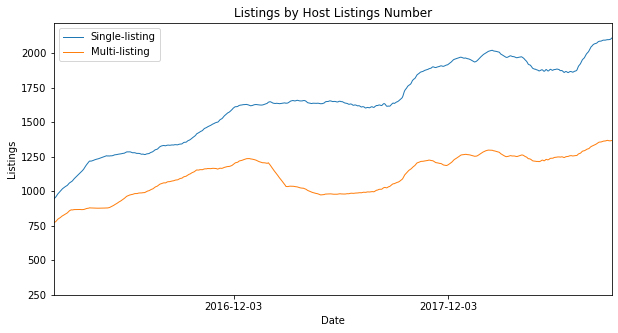

In [41]:
fix, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(list_count_port_single, '-', linewidth=1, label="Single-listing")
plt.plot(list_count_port_multi,'-', linewidth=1, label="Multi-listing")

# plt.axvline(x='2018-01-16', c='k', linestyle="--", linewidth=1, label='SF Regulation', alpha=0.5)
plt.title('Listings by Host Listings Number')
plt.xlabel('Date')
plt.ylabel('Listings')
plt.xlim(start_date, end_date)
plt.legend()
plt.show()

# Nightly Prices

## Overall

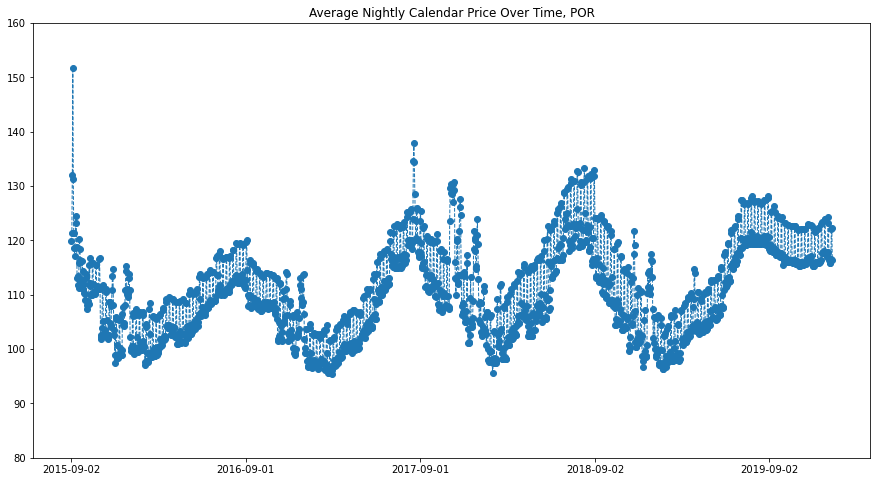

In [42]:
overall_prices = full_data.groupby(['res_date'])['calendar_price'].mean()

fix, ax = plt.subplots(figsize=(15, 8))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(overall_prices, '--o', linewidth=1, label="Portland")
plt.title('Average Nightly Calendar Price Over Time, ' + city_abbrev)
plt.ylim(80, 160)
plt.show()

## 30-day moving average prices

In [43]:
ma30_prices = full_data.groupby(['res_date'])['calendar_price'].mean().rolling(window=30).mean()

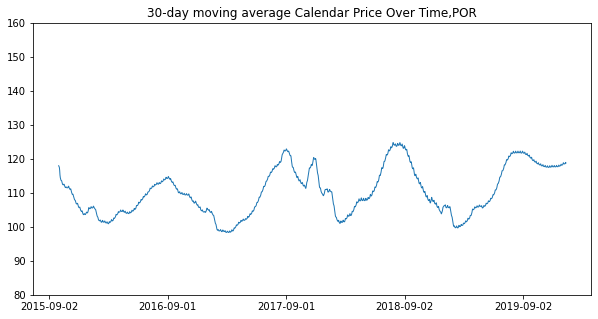

In [44]:
fix, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(ma30_prices, '-', linewidth=1)
plt.title('30-day moving average Calendar Price Over Time,' + city_abbrev)
plt.ylim(80, 160)
plt.show()

## Single vs. Multi-Listing Host Prices

In [45]:
full_data['host_listings_count'] = pd.to_numeric(full_data['host_listings_count'])

In [46]:
ma30_prices_single = full_data[full_data['host_listings_count']==1].groupby(['res_date'])['calendar_price'].mean().rolling(window=30).mean()
ma30_prices_multi = full_data[full_data['host_listings_count']>1].groupby(['res_date'])['calendar_price'].mean().rolling(window=30).mean()

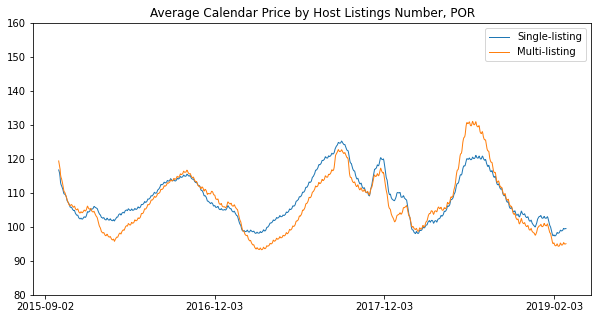

In [47]:
fix, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(ma30_prices_single, '-', linewidth=1, label="Single-listing")
plt.plot(ma30_prices_multi,'-', linewidth=1, label="Multi-listing")
plt.title('Average Calendar Price by Host Listings Number, ' + city_abbrev)
plt.legend()
plt.ylim(80, 160)
plt.show()

# Reviews

## Daily Review Count

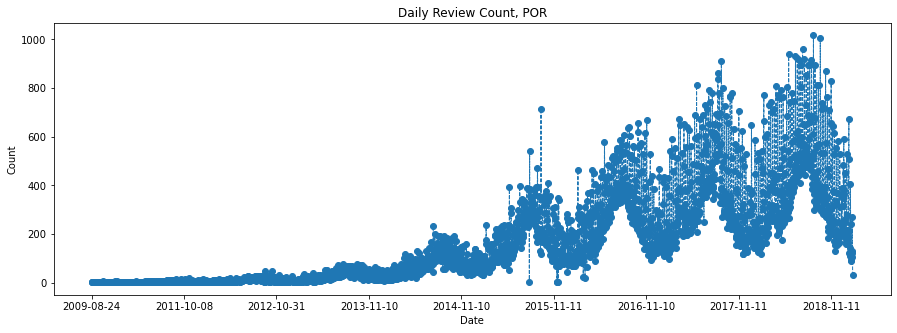

In [48]:
# Create review series
review_count = review_data.groupby(['date'])['id'].count()

# Create figure
fix, ax = plt.subplots(figsize=(15,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(review_count, '--o', linewidth=1)
plt.title('Daily Review Count, ' + city_abbrev)
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Cleaning Fees

In [49]:
ma30_cleaning_fee = full_data.groupby(['res_date'])['cleaning_fee'].mean().rolling(window=30).mean()

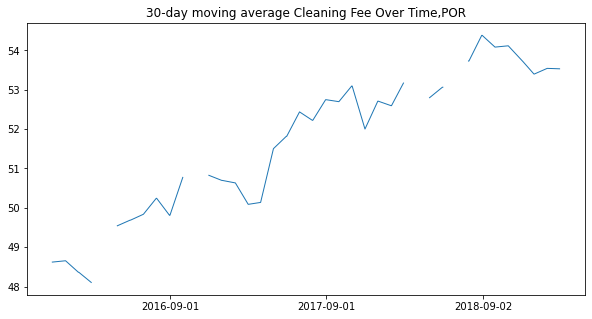

In [71]:
fix, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(ma30_cleaning_fee, '-', linewidth=1)
plt.title('30-day moving average Cleaning Fee Over Time,' + city_abbrev)
plt.show()

# Amenities Included

In [60]:
ma30_free_parking = full_data.groupby(['res_date'])['free_park'].mean().rolling(window=30).mean()
ma30_pool = full_data.groupby(['res_date'])['pool'].mean().rolling(window=30).mean()

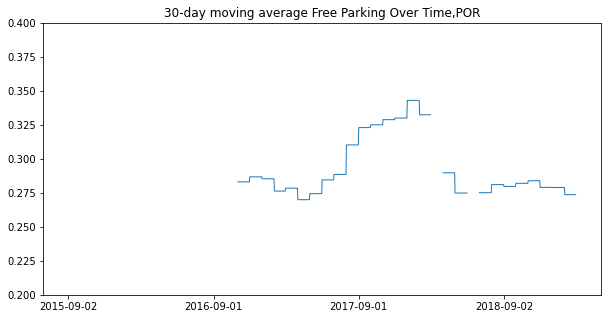

In [68]:
fix, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(ma30_free_parking, '-', linewidth=1)
plt.title('30-day moving average Free Parking Over Time,' + city_abbrev)
plt.ylim(0.2, 0.4)
plt.show()

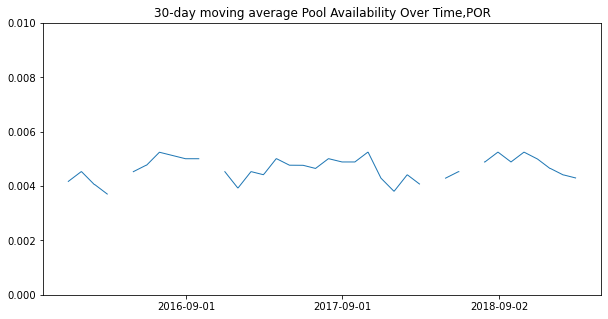

In [66]:
fix, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_locator(dates.YearLocator())
plt.plot(ma30_pool, '-', linewidth=1)
plt.title('30-day moving average Pool Availability Over Time,' + city_abbrev)
plt.ylim(0, .01)
plt.show()